# Tutorial 6: scikit-learn
### Dr. Daugherity, PHYS 453 - Spring 2020

I **promise** that this is the last new library we'll be adding to our development stack.  Seriously.  No more new modules.  As fun as it is to code classifiers by yourself, it is time to jump to the professional machine learning toolkit we'll be using for the rest of class. Let's dive in to scikit-learn (aka sklearn for short)

**REFERENCES**
* https://scikit-learn.org/stable/index.html


In [83]:
# Load libraries
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np

# it is generally best to just import what you need 
from sklearn import neighbors

# First Example - Nearest Neighbors
scikit-learn has two references to check:
* User Guide - https://scikit-learn.org/stable/modules/neighbors.html#
* API - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

Both will probably point you to copy-and-pasteable examples.

## Dataset
Start by loading our dataset from HW3:


In [84]:
iris = sns.load_dataset('iris')
df = iris.loc[(iris.species!='setosa'),['petal_length','sepal_length','species']].copy()   # only use 2 features and 2 species
df.drop_duplicates(subset=['petal_length','sepal_length'], inplace=True) # get rid of annoying duplicated points
df.reset_index(drop=True, inplace=True)  # clean up the index

### IMPORTANT NOTE ON DATA FORMAT
We've been dealing with data in **pandas dataframes**, but (for very good reasons) sklearn just wants plain **arrays** of numbers.  Converting is super easy, barely an inconvenience.

**SKLEARN FORMAT:**   
X - 2D array of feature (rows are samples, columns are features)  
y - 1D array of targets (numerical only, rows match X), for classifiers this is the sample's class


In [85]:
df.columns  # what do we have here?

Index(['petal_length', 'sepal_length', 'species'], dtype='object')

In [86]:
# copy and paste
features = ['petal_length', 'sepal_length'] 
target = ['species']

X = df[features].values

Pause for a second to compare:

In [87]:
df.head()

,petal_length,sepal_length,species
0,4.7,7.0,versicolor
1,4.5,6.4,versicolor
2,4.9,6.9,versicolor
3,4.0,5.5,versicolor
4,4.6,6.5,versicolor


In [88]:
X[:5]

array([[4.7, 7. ],
       [4.5, 6.4],
       [4.9, 6.9],
       [4. , 5.5],
       [4.6, 6.5]])

If our target column is already numerical, we just do the exact same thing.  Here is isn't, but pandas makes the conversion easy

In [89]:
pd.factorize(df.species)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64),
 Index(['versicolor', 'virginica'], dtype='object'))

In [90]:
y, classes = pd.factorize(df.species)

I knok it may seem like a lot, but it was really 4 lines of code:  
`features = [list of column names]
target = [column name for target class]
X = df[features].values  
y = df[target].values` OR `y, classes = pd.factorize(df.species)`
    
   
PS - going the other way is also easy:

In [91]:
df2 = pd.DataFrame(data=X, columns=features)
df2['target'] = classes[y]  # could just do y for numerical column
df2.head()

,petal_length,sepal_length,target
0,4.7,7.0,versicolor
1,4.5,6.4,versicolor
2,4.9,6.9,versicolor
3,4.0,5.5,versicolor
4,4.6,6.5,versicolor


Final note: sklearn has lots of datasets, including iris, that already come in (X,y) format

## Nearest Neighbors with sklearn
Use the nearest neighbors classifier: 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**EVERY** classifier/estimator in sklearn follows the same pattern:
1.  declare the classifier and set parameteres
2.  `fit` with the training data
3.  `predict` new data

In [92]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [93]:
pred = pd.read_csv('../Homework/HW3_pred.csv')
X_pred = pred[features].values

In [94]:
y_pred = clf.predict(X_pred)

In [95]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [96]:
#Or if you want the original class names:
classes[y_pred]

Index(['versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype='object')

# Plot Results
We have two reasonable options:
1.  Use matplotlib to plot our arrays
2.  Make new dataframes and plot with seaborn

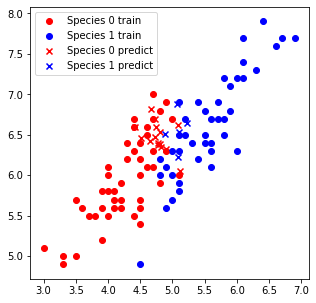

In [112]:
# matplotlib example:
plt.figure(figsize=(5,5))

plt.scatter(X[y==0,0], X[y==0,1], c='r', label='Species 0 train') #,'ro',label='Species 0')   # plots the 0th column on the x-axis, 1st columns on y
plt.scatter(X[y==1,0], X[y==1,1], c='b',label='Species 1 train') #,'bo',label='Species 0')   # plots the 0th column on the x-axis, 1st columns on y

plt.scatter(X_pred[y_pred==0,0], X_pred[y_pred==0,1], c='r', marker='x',label='Species 0 predict') 
plt.scatter(X_pred[y_pred==1,0], X_pred[y_pred==1,1], c='b', marker='x', label='Species 1 predict') 

plt.legend()
plt.show()

In [107]:
# SEABORN example
pred['species'] = classes[y_pred]

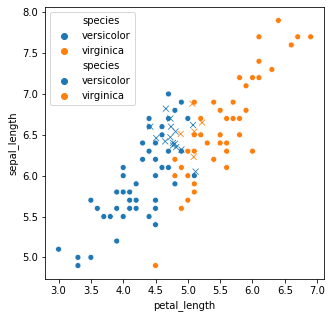

In [116]:
plt.figure(figsize=(5,5))

sns.scatterplot(x='petal_length', y='sepal_length', hue='species', data=df, hue_order=['versicolor','virginica'])
sns.scatterplot(x='petal_length', y='sepal_length', hue='species', marker='x', data=pred,hue_order=['versicolor','virginica'])

plt.show()

In [99]:
a = X_pred[y_pred==0,0]
b = X_pred[y_pred==0,1]


In [100]:
a

array([5.08, 4.73, 4.66, 4.74, 4.81, 5.12, 4.77, 4.65, 4.42, 4.9 , 4.8 ,
       4.51, 4.77, 4.73, 4.82])

In [101]:
b

array([6.62, 6.7 , 6.82, 6.6 , 6.54, 6.05, 6.4 , 6.42, 6.6 , 6.32, 6.39,
       6.46, 6.37, 6.47, 6.35])